In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data.csv')

data = data[~data['CustomerID'].isna()].reset_index(drop=True)
print len(data)
print data.keys()
import matplotlib.pyplot as plt
data['TotalRevenue'] = data['Quantity']*data['UnitPrice']
print data.iloc[5000:5005]

406829
Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country'],
      dtype='object')
     InvoiceNo StockCode                     Description  Quantity  \
5000    537026     22551        PLASTERS IN TIN SPACEBOY        12   
5001    537026    85099B         JUMBO BAG RED RETROSPOT        10   
5002    537026     22355       CHARLOTTE BAG SUKI DESIGN        10   
5003    537026     84992  72 SWEETHEART FAIRY CAKE CASES        24   
5004    537026      POST                         POSTAGE         2   

          InvoiceDate  UnitPrice  CustomerID  Country  TotalRevenue  
5000  12/3/2010 16:35       1.65     12395.0  Belgium          19.8  
5001  12/3/2010 16:35       1.95     12395.0  Belgium          19.5  
5002  12/3/2010 16:35       0.85     12395.0  Belgium           8.5  
5003  12/3/2010 16:35       0.55     12395.0  Belgium          13.2  
5004  12/3/2010 16:35      18.00     12395.0  Belgium          36.0  


In [2]:
data['Month'] = data['InvoiceDate'].apply(lambda x : x.split('/')[0]).astype(np.uint8)
data['Day'] = data['InvoiceDate'].apply(lambda x : x.split('/')[1]).astype(np.uint8)
data['Year'] = data['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[0]).astype(np.uint16)
data['Time'] = data['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[1])
data['Hour']= data['Time'].apply(lambda x : x.split(':')[0]).astype(np.uint8)
data['Min']= data['Time'].apply(lambda x : x.split(':')[1]).astype(np.uint8)
print data.head()

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  Month  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom         15.30     12   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom         20.34     12   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom         22.00     12   
3  12/1/2010 8:26       3.39     17850.0  United Kingdom         20.34     12   
4  12/1/2010 8:26       3.39     17850.0  United Kingdom         20.34     12   

   Day  Year  Time  Hour  Min  
0    1  2010  8:26     8   26  
1    1  2010  8:

In [3]:
temp = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)

(array([4.31e+03, 1.20e+01, 3.00e+00, 1.00e+00, 0.00e+00, 2.00e+00]), array([     0,  50000, 100000, 150000, 200000, 250000, 300000]), <a list of 6 Patch objects>)


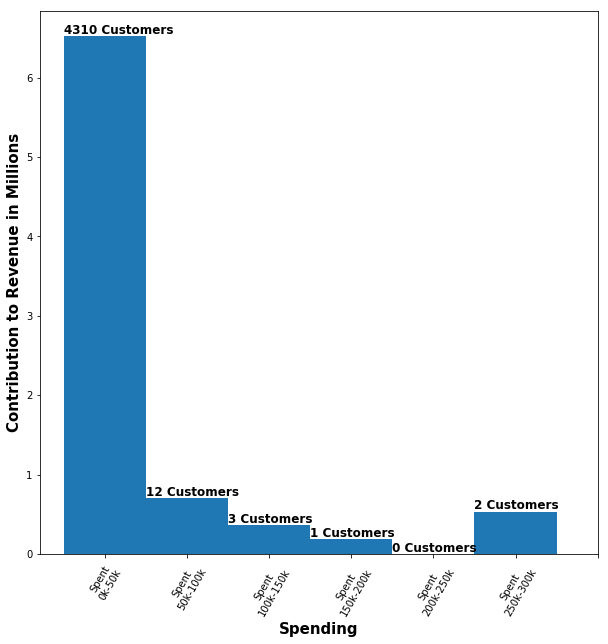

In [4]:
#ignoring customers who causes losses because they are small portion of revenue
bins=range(0000,300001,50000)
xx=plt.hist(temp['TotalRevenue'],bins=bins)
print xx
plt.close()
plt.subplots(figsize=(10,10))
xxx=plt.hist(temp['TotalRevenue'],weights = temp['TotalRevenue'].values/1000000, bins=bins)
for i in range(len(xxx[1])-1):
    plt.text(xxx[1][i],xxx[0][i]+0.03,str(int(xx[0][i]))+' Customers',fontsize=12,fontweight='bold')
plt.xticks(np.array(bins)+25000,['Spent\n' + str(bins[x]/1000)+'k-'+str(bins[x+1]/1000)+'k' for x in  range(len(bins)-1)],rotation=60)
plt.xlabel('Spending',fontsize=15,fontweight='bold')
plt.ylabel('Contribution to Revenue in Millions',fontsize=15,fontweight='bold')
plt.show()

In [5]:
#identiy bad customers

In [6]:
def f(x):
    if  x[:-1].isdigit() and x[-1].isdigit() is False:
        return x[:-1]
    else : return x
data['StockCode_NR'] = data['StockCode'].apply(f)

#returns cost 0.1%, so ignore first
data = data[data['TotalRevenue']>0].reset_index(drop=True)

0 Top 0.01 percent of customers,3.0 percent of profit
4 Top 0.1 percent of customers,12.0 percent of profit
43 Top 1 percent of customers,32.0 percent of profit
86 Top 2 percent of customers,39.0 percent of profit
216 Top 5 percent of customers,50.0 percent of profit
433 Top 10 percent of customers,61.0 percent of profit
867 Top 20 percent of customers,75.0 percent of profit
2169 Top 50 percent of customers,92.0 percent of profit


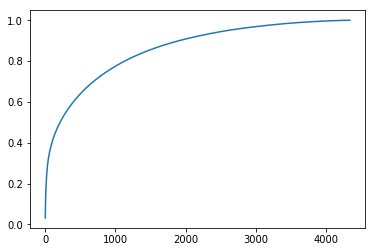

In [7]:
# are there any subgroups of important customer
temp = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
temp2 = temp.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=True)
result,val = [] ,0
for i in range(len(temp2)):
    val += temp2.iloc[i]['TotalRevenue']
    result += [val,]
temp2['cummulative_profit'] = np.array(result)/val
for i in [0.01,0.1,1,2,5,10,20,50]:
    num = int(len(temp2)*1.*i/100)
    print num,
    print 'Top %s percent of customers,%s percent of profit'%(i,100*np.round(temp2.loc[num]['cummulative_profit'],2))
plt.plot(temp2['cummulative_profit']);plt.show()

0 Top 0.01 percent of products,2.0 percent of profit
3 Top 0.1 percent of products,5.0 percent of profit
32 Top 1 percent of products,14.000000000000002 percent of profit
64 Top 2 percent of products,22.0 percent of profit
160 Top 5 percent of products,37.0 percent of profit
320 Top 10 percent of products,51.0 percent of profit
640 Top 20 percent of products,70.0 percent of profit
1600 Top 50 percent of products,91.0 percent of profit
1920 Top 60 percent of products,94.0 percent of profit


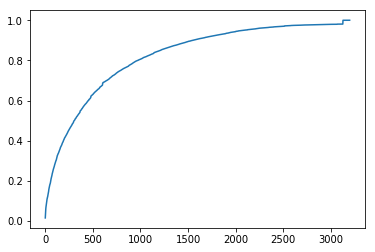

589
threshold= 200 , 0.18 of products account for 0.672 of revenue




In [8]:
# are there any subgroups of important customer
temp = data.groupby(['StockCode_NR'])['TotalRevenue'].apply(sum).reset_index(drop=False)
temp['num_times_brought'] = data.groupby(['StockCode_NR'])['TotalRevenue'].apply(len).reset_index(drop=True)
temp2 = temp.sort_values('num_times_brought').iloc[::-1].reset_index(drop=True)

result,val = [0,] ,0
for i in range(len(temp2)):
    val += temp2.iloc[i]['TotalRevenue']
    result += [val,]
temp2['cummulative_profit'] = np.array(result[1:])/val
temp2['Total_profit'] = (np.array(result[1:])-np.array(result[:-1]))/val
for i in [0.01,0.1,1,2,5,10,20,50,60]:
    num = int(len(temp2)*1.*i/100)
    print num,
    print 'Top %s percent of products,%s percent of profit'%(i,100*np.round(temp2.loc[num]['cummulative_profit'],2))
plt.plot(temp2['cummulative_profit']);plt.show()
x = 200
print np.sum(temp2['num_times_brought']>x)
print 'threshold=',x,',',np.round(np.mean(temp2['num_times_brought']>x),2),'of products account for',
print np.round(np.sum(temp2[temp2['num_times_brought']>x]['TotalRevenue'])/np.sum(temp2['TotalRevenue']),3),'of revenue\n\n'
temp3 = temp2[temp2['num_times_brought']>x]
data2 = pd.merge(data,temp3[['StockCode_NR','num_times_brought','Total_profit']]
         ,on='StockCode_NR',how='inner')


In [9]:
customer_info = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
customer_info = customer_info.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=False)

for year in pd.unique(data.Year):
    for month in sorted(map(int,pd.unique(data.Month))):
        temp0  =  data2[(data2.Year==year) & (data2.Month==month)]
        if len(temp0) == 0:
            continue
        temp = temp0.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
        temp2 = temp.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=True)
        result,val = [] ,0
        for i in range(len(temp2)):
            val += temp2.iloc[i]['TotalRevenue']
            result += [val,]
        temp2['cummulative_profit'] = np.array(result)/val
        temp2.rename(columns={'TotalRevenue' : 'Revenue_%s_%s'%(year,month)},inplace=True)
        customer_info = pd.merge(customer_info,temp2[temp2.keys()[:2]],on='CustomerID',how='left').fillna(0)
    

In [10]:
dictt_StockCode = {}
counter = 0
for i in data2.groupby(['num_times_brought','StockCode_NR']).apply(len).reset_index(drop=False)['StockCode_NR'].iloc[::-1]:
    dictt_StockCode[i] = counter
    counter += 1
data2['StockCode_NR_int'] = data2['StockCode_NR'].map(dictt_StockCode)
print counter

589


In [11]:
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([3,])))]
len(train),len(test)

/home/leexiongan/anaconda3/envs/python27/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


(38838, 15860)

In [12]:
customer_info

,index,CustomerID,TotalRevenue,Revenue_2010_12,Revenue_2011_1,Revenue_2011_2,Revenue_2011_3,Revenue_2011_4,Revenue_2011_5,Revenue_2011_6,Revenue_2011_7,Revenue_2011_8,Revenue_2011_9,Revenue_2011_10,Revenue_2011_11,Revenue_2011_12
0,1689,14646.0,280206.02,5732.86,19827.06,15007.52,14147.30,2671.16,20996.02,22061.04,19.57,29950.46,18026.04,27105.55,19421.10,7233.92
1,4201,18102.0,259657.30,16938.56,0.00,10535.48,6909.32,1196.96,10180.44,27834.40,16143.44,715.68,29004.24,6674.86,3380.28,2158.26
2,3728,17450.0,194550.79,2028.84,16548.96,0.00,5791.76,614.40,8344.08,3225.80,8485.14,12547.46,55780.90,3863.16,26780.81,1562.40
3,3008,16446.0,168472.50,0.00,0.00,0.00,0.00,0.00,1.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1879,14911.0,143825.06,4779.63,3227.45,774.29,7463.90,2122.48,5789.07,6470.40,8633.11,8620.03,12179.56,11034.63,14569.50,4014.27
5,55,12415.0,124914.53,0.00,4639.56,10581.32,12732.12,350.00,7758.04,18138.87,1896.57,14211.32,2771.80,6773.51,5479.48,0.00
6,1333,14156.0,117379.63,0.00,10011.76,5223.95,4693.84,2197.17,3424.78,6686.78,17169.47,3481.88,15925.13,2747.57,4189.31,0.00
7,3771,17511.0,91062.38,4755.52,3359.02,5512.10,6602.55,2263.94,5963.40,3631.96,5838.26,7476.56,5667.62,3863.81,12448.56,4466.70
8,2702,16029.0,81024.84,7665.44,1623.48,3786.84,1760.04,1016.88,10639.23,3088.08,1536.96,10228.30,3082.50,24202.80,632.30,0.00
9,0,12346.0,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
#get all orders from customer during time period 
Invoice = train.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info,Invoice,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders'},inplace=True)
Invoice_future = test.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future'},inplace=True)
customer_info_orders = customer_info_orders.sort_values('CustomerID').reset_index(drop=True)
#print customer_info_orders

In [14]:
matrix_past = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders']
        for j,k in zip(pdt,quantity):
            matrix_past[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

4429

In [15]:
matrix_future = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future']
        for j,k in zip(pdt,quantity):
            matrix_future[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [16]:
customer_info_orders.describe()

,index,CustomerID,TotalRevenue,Revenue_2010_12,Revenue_2011_1,Revenue_2011_2,Revenue_2011_3,Revenue_2011_4,Revenue_2011_5,Revenue_2011_6,Revenue_2011_7,Revenue_2011_8,Revenue_2011_9,Revenue_2011_10,Revenue_2011_11,Revenue_2011_12
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,2168.500000,15300.408022,2054.266460,86.834318,75.489765,69.761634,93.314477,73.209993,112.110357,112.385281,101.882923,109.345343,153.441720,152.892621,185.501404,53.857888
std,1252.417063,1721.808492,8989.230441,498.213079,532.528174,414.887659,493.307342,335.019454,554.434732,959.799665,553.050214,766.876861,1098.223889,792.301985,790.586004,290.258811
min,0.000000,12346.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1084.250000,13813.250000,307.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2168.500000,15299.500000,674.485000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3252.750000,16778.750000,1661.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.825000,106.005000,169.327500,0.000000
max,4337.000000,18287.000000,280206.020000,16938.560000,19827.060000,15007.520000,14147.300000,12266.500000,20996.020000,39916.500000,17169.470000,29950.460000,55780.900000,27105.550000,26780.810000,7233.920000


589


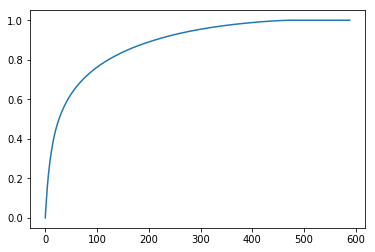

In [17]:
# recommendation system , for our case since entries are small, we use SVD to do matrix factorization
# instead of a less expensive but approximate algorithm like alternating last squares. WARNING This is not scalable. 
U,D,V = np.linalg.svd(matrix_past)
Z = sum(D)
print len(D)
#D = D[:25]

plt.plot(map(lambda x : np.sum(D[:x])/Z,range(len(D))))

In [18]:
num = 25
U2=U[:,:num]
D2=D[:num]
V2=V[:num]
print matrix_past
np.matmul(np.matmul(U2,np.diag(D2)),V2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [4. 2. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[ 2.6215485e-14, -1.2635608e-14,  2.3482294e-14, ...,
         2.5129187e-14,  0.0000000e+00,  1.3203462e-14],
       [-1.7631893e-01,  3.1104341e-01, -3.0240273e-01, ...,
         4.7581336e-01,  0.0000000e+00,  1.3383004e-01],
       [-2.6533945e+00, -4.3566346e-02, -2.9522953e+00, ...,
        -7.0927773e+00,  0.0000000e+00,  2.5860763e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.7938557e+00,  3.0506375e+00, -1.0413751e-03, ...,
         1.9074477e-01,  0.0000000e+00, -5.6960538e-02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [19]:
customer_info_orders.iloc[1]

index                                                              1
CustomerID                                                     12347
TotalRevenue                                                    4310
Revenue_2010_12                                                272.1
Revenue_2011_1                                                247.25
Revenue_2011_2                                                     0
Revenue_2011_3                                                     0
Revenue_2011_4                                                453.65
Revenue_2011_5                                                     0
Revenue_2011_6                                                256.62
Revenue_2011_7                                                     0
Revenue_2011_8                                                273.01
Revenue_2011_9                                                     0
Revenue_2011_10                                               816.14
Revenue_2011_11                   

In [20]:
for i in range(counter):
    customer_info_orders[i] = matrix_past[:,i].astype(np.uint16)
for i in range(U2.shape[1]):
    customer_info_orders['svd_'+str(i)] = U2[:,i].astype(np.float32)

In [21]:
import xgboost as xgb
customer_info_orders.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in customer_info_orders.columns.values]

predictors = list(customer_info_orders.keys()[3:6])+\
                     list([x for x in customer_info_orders.keys() if 'svd' in str(x)])+\
                     range(counter)
target = 'target'
customer_info_orders[target]= np.log10(1+matrix_future[:,0])
dtrain = customer_info_orders.iloc[::2]
dcv = customer_info_orders.iloc[1::2]
 
gc.collect()


7

In [22]:
predictors

['Revenue_2010_12',
 'Revenue_2011_1',
 'Revenue_2011_2',
 'svd_0',
 'svd_1',
 'svd_2',
 'svd_3',
 'svd_4',
 'svd_5',
 'svd_6',
 'svd_7',
 'svd_8',
 'svd_9',
 'svd_10',
 'svd_11',
 'svd_12',
 'svd_13',
 'svd_14',
 'svd_15',
 'svd_16',
 'svd_17',
 'svd_18',
 'svd_19',
 'svd_20',
 'svd_21',
 'svd_22',
 'svd_23',
 'svd_24',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 

In [23]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.05
params["min_child_weight"] = 1
params["subsample"] = 0.3
params["colsample_bytree"] = 0.3
params["scale_pos_weight"] = 1.0
params["silent"] = 1
params["verbose"] = 1
params["max_depth"] = 5
#params["nthread"] = 6
params["nthread"] = -1
early_stopping_rounds = 50
plst = list(params.items())
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
#    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
#            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
watchlist  = [ (xgtrain,'train'),(xgcv,'eval')]
a = {}
model=xgb.train(plst,xgtrain,4500,watchlist,early_stopping_rounds=early_stopping_rounds,evals_result=a)
model.get_fscore

[0]	train-rmse:0.497814	eval-rmse:0.501002
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1]	train-rmse:0.477168	eval-rmse:0.480698
[2]	train-rmse:0.457986	eval-rmse:0.462733
[3]	train-rmse:0.439993	eval-rmse:0.44501
[4]	train-rmse:0.423397	eval-rmse:0.429323
[5]	train-rmse:0.407423	eval-rmse:0.414299
[6]	train-rmse:0.39195	eval-rmse:0.399577
[7]	train-rmse:0.3776	eval-rmse:0.385871
[8]	train-rmse:0.364233	eval-rmse:0.373489
[9]	train-rmse:0.351996	eval-rmse:0.361882
[10]	train-rmse:0.340592	eval-rmse:0.351167
[11]	train-rmse:0.329411	eval-rmse:0.340872
[12]	train-rmse:0.319173	eval-rmse:0.331135
[13]	train-rmse:0.309567	eval-rmse:0.322286
[14]	train-rmse:0.300426	eval-rmse:0.314435
[15]	train-rmse:0.291719	eval-rmse:0.306301
[16]	train-rmse:0.284068	eval-rmse:0.299427
[17]	train-rmse:0.277034	eval-rmse:0.293369
[18]	train-rmse:0.270533	eval-rmse:0.286956
[19]	train-rmse:0.264345	eval-rmse:

<bound method Booster.get_fscore of <xgboost.core.Booster object at 0x7f4a5ccf9e90>>

In [24]:
U.shape

(4338, 4338)

In [25]:
V.shape

(589, 589)

In [26]:

for i in range(len(predictors)):
    try:
        print model.get_fscore()['f'+str(i)],predictors[i]
    except : 
        print 0,predictors[i]

55 Revenue_2010_12
61 Revenue_2011_1
54 Revenue_2011_2
63 svd_0
68 svd_1
48 svd_2
39 svd_3
39 svd_4
13 svd_5
28 svd_6
19 svd_7
30 svd_8
16 svd_9
15 svd_10
10 svd_11
14 svd_12
20 svd_13
16 svd_14
13 svd_15
17 svd_16
10 svd_17
15 svd_18
20 svd_19
10 svd_20
12 svd_21
19 svd_22
15 svd_23
22 svd_24
24 0
5 1
3 2
6 3
2 4
1 5
1 6
2 7
5 8
2 9
0 10
0 11
10 12
1 13
4 14
0 15
0 16
2 17
1 18
2 19
2 20
1 21
3 22
6 23
0 24
1 25
0 26
2 27
22 28
1 29
1 30
2 31
1 32
1 33
0 34
5 35
1 36
3 37
0 38
1 39
0 40
10 41
2 42
1 43
15 44
0 45
0 46
0 47
1 48
0 49
0 50
6 51
0 52
1 53
0 54
0 55
1 56
0 57
0 58
2 59
1 60
4 61
1 62
1 63
6 64
2 65
1 66
0 67
4 68
0 69
1 70
0 71
2 72
0 73
4 74
0 75
7 76
1 77
0 78
0 79
3 80
0 81
0 82
14 83
0 84
0 85
0 86
3 87
0 88
4 89
1 90
7 91
0 92
2 93
2 94
4 95
2 96
1 97
5 98
0 99
0 100
0 101
0 102
0 103
0 104
14 105
3 106
2 107
1 108
5 109
6 110
1 111
0 112
1 113
0 114
0 115
0 116
0 117
5 118
1 119
0 120
0 121
1 122
0 123
0 124
0 125
1 126
1 127
2 128
0 129
5 130
9 131
0 132
1 133
1 13

In [27]:
np.matmul(np.matmul(U,np.diag(np.concatenate([D,[0,]*(len(U)-len(D))]))[:,:len(V)]),V)

array([[ 2.83916979e-16,  3.95452280e-15,  2.17492058e-15, ...,
         1.50137918e-14,  0.00000000e+00,  2.39905363e-15],
       [-3.15304997e-07,  4.98285981e-08,  3.00000015e+00, ...,
        -1.93210058e-08,  0.00000000e+00,  9.97178115e-08],
       [ 1.40105295e-06, -3.58873394e-07,  9.15255438e-08, ...,
         3.05842168e-07,  0.00000000e+00,  1.78209267e-06],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.00000006e+00,  2.00000011e+00, -7.63072222e-08, ...,
         2.75296154e-08,  0.00000000e+00,  5.64271174e-09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])